In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from typing import Union
from astropy.io import fits

ModuleNotFoundError: No module named 'seaborn'

In [95]:
pstarrs_df = pd.read_csv('/Users/adamboesky/Research/ay98/clean_data/panstarrs_photometry.csv')

In [96]:
with open('/Users/adamboesky/Research/ay98/clean_data/all_photometry.pkl', 'rb') as f:
    all_photo = pickle.load(f)

In [97]:
all_photo['sorted_filters']

['G',
 'R',
 'I',
 'Z',
 'Y',
 'J',
 'H',
 'Ks',
 'CH1',
 'CH2',
 'MIPS24',
 'MIPS70',
 'PACS100',
 'MIPS160',
 'PACS160',
 'SPIRE250',
 'SPIRE350',
 'SPIRE500']

In [159]:
photo = all_photo['data'].T[:5].T
photo.shape

(2691042, 5)

In [160]:
pstarrs_df.keys()

Index(['Unnamed: 0', 'raMean', 'decMean', 'gMeanApMag', 'rMeanApMag',
       'iMeanApMag', 'zMeanApMag', 'yMeanApMag', 'gMeanApMagErr',
       'rMeanApMagErr', 'iMeanApMagErr', 'zMeanApMagErr', 'yMeanApMagErr'],
      dtype='object')

In [161]:
def ab_mag_to_flux(AB_mag: Union[np.ndarray, float, int]) -> Union[np.ndarray, float, int]:
    """Convert AB magnitude to flux.
    Params:
        AB_mag: The AB magnitude.
    Returns:
        The fluxes values (Janskys).
    """
    return 10**((AB_mag - 8.9) / -2.5) * 1000

(0.0, 0.5)

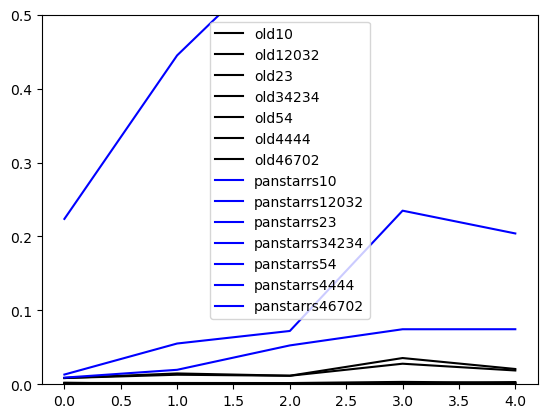

In [162]:
inds = [10, 12032, 23, 34234, 54, 4444, 46702]
plt.plot(photo[inds].T, label=[f'old{i}' for i in inds], color='k')
plt.plot(ab_mag_to_flux(pstarrs_df[['gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag']].iloc[inds]).to_numpy().T, label=[f'panstarrs{i}' for i in inds], color='blue')
plt.legend()
plt.ylim((0, 0.5))

In [163]:
fits_data = np.array(fits.open('/Volumes/T7/ay_98_data/Zou_data/photometry/es1_photcat.v1.fits')[1].data)
# fits_data = np.hstack((fits_data, fits.open('/Volumes/T7/ay_98_data/Zou_data/sed_catalog/wcdfs.v1.fits')[1].data))
# fits_data = np.hstack((fits_data, fits.open('/Volumes/T7/ay_98_data/Zou_data/sed_catalog/xmmlss.v1.fits')[1].data))

In [164]:
grizy_bands = ['mag_G_DES', 'mag_R_DES', 'mag_I_DES', 'mag_Z_DES', 'mag_Y_DES',]

In [165]:
mags = np.array([fits_data[b] for b in grizy_bands]).T
mags.shape

(826242, 5)

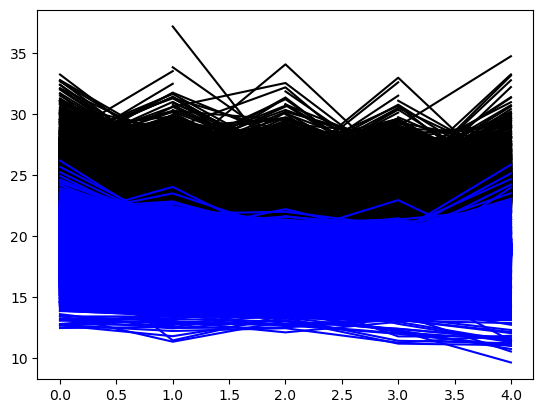

In [167]:
inds = np.arange(1, 10000, 1, dtype=int)
plt.plot(mags[inds].T, label=[f'old{i}' for i in inds], color='k')
plt.plot(pstarrs_df[['gMeanApMag', 'rMeanApMag', 'iMeanApMag', 'zMeanApMag', 'yMeanApMag']].iloc[inds].to_numpy().T, label=[f'panstarrs{i}' for i in inds], color='blue')
# plt.legend()
# plt.ylim((0, 0.5))
plt.show()

In [168]:
with open('/Users/adamboesky/Research/ay98/clean_data/xmmlss_preprocessed.pkl', 'rb') as f:
    pp = pickle.load(f)

with open('/Users/adamboesky/Research/ay98/clean_data/xmmlss_preprocessed2.pkl', 'rb') as f:
    pp2 = pickle.load(f)

In [172]:
pp.keys()

dict_keys(['photometry', 'catalog'])

In [5]:
import pickle
import numpy as np

from astropy.table import Table
from astropy.io import ascii
from astropy.coordinates import Angle

In [4]:
tab = Table.read('/n/holystore01/LABS/berger_lab/Users/aboesky/Weird_Galaxies/panstarrs_hosts.ecsv', format='ascii.csv')

In [6]:
if asd:
    print('sd')
else:
    print('no')

NameError: name 'asd' is not defined

In [6]:
table = ascii.read("/n/holystore01/LABS/berger_lab/Users/aboesky/Weird_Galaxies/panstarrs_hosts.ecsv", delimiter=' ')

In [7]:
table

objID_3pi,raStack_3pi,decStack_3pi,primaryDetection_3pi,gKronMag_3pi,rKronMag_3pi,iKronMag_3pi,zKronMag_3pi,yKronMag_3pi,gKronMagErr_3pi,rKronMagErr_3pi,iKronMagErr_3pi,zKronMagErr_3pi,yKronMagErr_3pi,ps_score_3pi,SN_ra,SN_dec
str18,str12,str12,str1,str7,str7,str7,str7,str7,str8,str8,str8,str8,str8,str10,float64,float64
107721619205892726,161.92064364,-0.23139161,1,22.0668,21.425,20.407,20.0965,20.1203,0.0961,0.101155,0.051494,0.043988,0.122115,0.0,161.92058333333333,-0.23130555555555557
107712058701603113,205.87023383,-0.23935961,1,22.5147,20.9821,20.9743,20.3913,20.2973,0.091763,0.074575,0.05595,0.049043,0.082456,0.01495833,205.87024999999997,-0.23947222222222223
107632063598837037,206.35988994,-0.30289261,1,20.0823,19.5422,19.0951,18.9862,19.0652,0.019853,0.02099,0.019187,0.022971,0.044885,0.00145833,206.3599583333333,-0.30294444444444446
108082062811722707,206.28113041,0.06858074,1,20.4369,19.5517,19.1605,18.7795,18.885,0.031441,0.021713,0.021385,0.01781,0.060082,0.0,206.28124999999997,0.06858333333333333
147920354998995147,35.49988855,33.2704423,1,nan,nan,nan,13.2301,nan,nan,nan,nan,0.000708,nan,0.3365476,35.499916666666664,33.270472222222224
154362201644320273,220.16438072,38.63310504,1,19.3579,17.0262,17.5039,17.6189,nan,0.012528,0.003898,0.004463,0.008622,nan,0.1851964,220.16457499999996,38.632930555555554
78403386241262777,338.62412386,-24.66461784,1,14.6607,13.9367,13.5433,13.3523,13.3793,0.000916,0.000576,0.000492,0.000781,0.001559,0.1346905,338.6242083333333,-24.664555555555555
88680959370393358,95.93704409,-16.09752001,1,nan,nan,19.2281,nan,nan,nan,nan,0.010247,nan,nan,0.1107202,95.93695833333334,-16.0975
155182501167214794,250.11673555,39.32014102,1,14.323,13.5509,13.1936,12.9685,13.7157,0.000613,0.000412,0.000293,0.000488,0.000739,0.1284286,250.11674999999997,39.32022222222223


In [13]:
last_ra, last_dec = table[-1]['SN_ra'], table[-1]['SN_dec']
last_ra, last_dec

(35.728045833333326, 34.10851944444445)

In [16]:
(table['SN_ra'] == last_ra) & (table['SN_dec'] == last_dec)

array([False, False, False, ..., False, False,  True])

In [21]:
with open('/n/holystore01/LABS/berger_lab/Users/aboesky/Weird_Galaxies/sn_coords_clean.csv', 'rb') as f:
    sne = pickle.load(f)

# Create empty columns
cols = ['raMean', 'decMean'] + [f'{filt}MeanApMag' for filt in ['g', 'r', 'i', 'z', 'y']] + [f'{filt}MeanApMagErr' for filt in ['g', 'r', 'i', 'z', 'y']]  # desired columns
sne[cols] = np.NaN

In [1]:
sne.columns.dytpe = col_types

NameError: name 'col_types' is not defined

In [5]:
n = len(sne)
for i, sn_ra, sn_dec in zip(range(n), sne['ra'], sne['dec']):
    # Put angles in a dictionary
    dec_ang = Angle(f'{sn_dec.split(",")[0]} degrees')
    ra_ang = Angle(sn_ra.split(',')[0], unit='hourangle')

    if ra_ang.deg == last_ra and  dec_ang.deg == last_dec:
        print(f'Search going to pick up from row {i} / {n}')
        last_searched_ind = i
        break

NameError: name 'sne' is not defined

In [31]:
range(n)[last_searched_ind:], sne['ra'][0:], sne['ra'][last_searched_ind:]

(range(24643, 82605),
 0                            10:47:06.52
 1                            10:45:42.76
 2                            10:47:40.94
 3                               11:58:30
 4                            13:43:28.86
                       ...               
 82600           04:03:51.590,04:03:51.59
 82601           03:59:48.720,03:59:48.72
 82602                        02:38:07.29
 82603                        05:14:47.80
 82604    15:05:30.1,15:05:30.07,15:05:30
 Name: ra, Length: 82605, dtype: object,
 24643                       02:22:54.731
 24644                       21:23:36.316
 24645                       03:11:29.246
 24646                       22:28:08.432
 24647                       17:06:12.371
                       ...               
 82600           04:03:51.590,04:03:51.59
 82601           03:59:48.720,03:59:48.72
 82602                        02:38:07.29
 82603                        05:14:47.80
 82604    15:05:30.1,15:05:30.07,15:05:30
 Name: ra, Le

In [25]:
(sne['dec'] == last_ra) & (table['SN_dec'] == last_dec)

,index,event,alias,catalog,claimedtype,dec,discoverdate,discoverer,download,ebv,...,gMeanApMag,rMeanApMag,iMeanApMag,zMeanApMag,yMeanApMag,gMeanApMagErr,rMeanApMagErr,iMeanApMagErr,zMeanApMagErr,yMeanApMagErr
